In [7]:
"""
信用卡异常预测
"""
import pandas as pd
import numpy as np
#读取数据并展示
data_set = pd.read_csv("E:/python_data/creditcard.csv")
data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
"""
对数据进行归一化的处理
"""
from sklearn.preprocessing import StandardScaler

data_set['normalAmount'] = StandardScaler().fit_transform(data_set['Amount'].values.reshape(-1, 1))
data_set = data_set.drop(['Time','Amount'],axis=1)
data_set.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


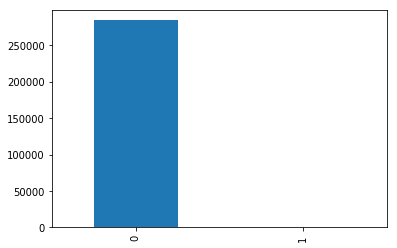

In [20]:
#展示样本数据的标签值的分布情况
num = pd.value_counts(data_set["Class"],sort="True").sort_index()
num.plot(kind="bar")


In [51]:
"""
1、通过下采样采取数据
"""


#class值为1的个数
num_1 = len(data_set[data_set["Class"] == 1])
#class值为0和为1分别对应的索引
value_1_indexes = data_set[data_set["Class"] == 1].index
value_0_indexes = data_set[data_set["Class"] == 0].index

under_sample_0_indexes = np.random.choice(value_0_indexes,num_1,replace=False)

#获取下采样之后的数据

under_sample_0_data = data_set.iloc[under_sample_0_indexes,:]
under_sample_1_data = data_set.iloc[value_1_indexes,:]
under_sample_data = pd.concat([under_sample_0_data,under_sample_1_data] )



print("下采样之后class为1的数据占比：",len(under_sample_data[under_sample_data["Class"] == 1])/len(under_sample_data))
print("下采样之后class为0的数据占比：",len(under_sample_data[under_sample_data["Class"] == 0])/len(under_sample_data))
print("下采样之后总的样本数据：",len(under_sample_data))


下采样之后class为1的数据占比： 0.5
下采样之后class为0的数据占比： 0.5
下采样之后总的样本数据： 984


In [93]:
"""
1、对样本数据进行训练集和测试集的提取，通过sklearn
2、执行逻辑回归，通过sklearn,使用交叉验证的方式
"""
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

#取出特征值和标签值
x_under_sample_data = under_sample_data.iloc[:,under_sample_data.columns != "Class"]
y_under_sample_data = under_sample_data.iloc[:,under_sample_data.columns =="Class"]

x_train,x_test ,y_train,y_test = train_test_split(x_under_sample_data,y_under_sample_data,test_size = 0.3)

params = [0.001,0.01,0.1,1,10,20]

for c_param in params:
    lr = LogisticRegression(C = c_param, solver='liblinear',penalty = 'l2')
    print('-------------------------------------------')
    print('C parameter: ', c_param)
    print('-------------------------------------------')
    #交叉验证
    accs=cross_val_score(lr, x_under_sample_data, y=y_under_sample_data.values.ravel(), scoring=None,cv=10, n_jobs=1)
    print(" vag:",accs.mean())






-------------------------------------------
C parameter:  0.001
-------------------------------------------
 vag: 0.9105102040816326
-------------------------------------------
C parameter:  0.01
-------------------------------------------
 vag: 0.9419591836734694
-------------------------------------------
C parameter:  0.1
-------------------------------------------
 vag: 0.9490816326530613
-------------------------------------------
C parameter:  1
-------------------------------------------
 vag: 0.9320204081632653
-------------------------------------------
C parameter:  10
-------------------------------------------
 vag: 0.9289999999999999
-------------------------------------------
C parameter:  20
-------------------------------------------
 vag: 0.9320204081632653


[[147   4]
 [ 11 134]]
recall rate: 0.930379746835443
精度： 0.9493243243243243


D:\anaconda\lib\site-packages\matplotlib\figure.py:2359: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


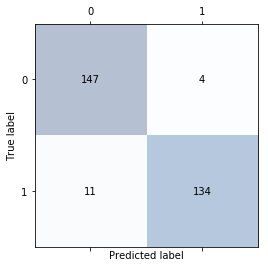

In [111]:
"""
画混淆矩阵
"""
from matplotlib import pyplot as plt
#召回率：TP/(TP + FN) 0属于正列 1属于负列
from sklearn.metrics  import confusion_matrix
lr = LogisticRegression(C = 0.1, solver='liblinear',penalty = 'l2')
lr.fit(x_train,y_train.values.ravel())
y_predict = lr.predict(x_test)

#生成真实值和预测值的混淆矩阵
cm = confusion_matrix(y_test,y_predict,labels=[0,1])

print("recall rate:",cm[0,0]/(cm[0,0]+cm[1,0]))
print("精度：",(cm[0,0]+cm[1,1])/(cm[1,0] + cm[1,1]+cm[0,0]+cm[0,1]))


plt.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x = j, y = i,          #ax.text()在轴上添加文本
                s = cm[i, j], 
                va = 'center', 
                ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
 
plt.tight_layout()



In [112]:
"""
使用全部的样本数据进行训练模型
"""
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

#取出特征值和标签值
x_data = data_set.iloc[:,under_sample_data.columns != "Class"]
y_data = data_set.iloc[:,under_sample_data.columns =="Class"]

x_train,x_test ,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.3)

params = [0.001,0.01,0.1,1,10,20]

for c_param in params:
    lr = LogisticRegression(C = c_param, solver='liblinear',penalty = 'l2')
    print('-------------------------------------------')
    print('C parameter: ', c_param)
    print('-------------------------------------------')
    #交叉验证
    accs=cross_val_score(lr, x_data, y=y_data.values.ravel(), scoring=None,cv=10, n_jobs=1)
    print(" vag:",accs.mean())


-------------------------------------------
C parameter:  0.001
-------------------------------------------
 vag: 0.9990730573777942
-------------------------------------------
C parameter:  0.01
-------------------------------------------
 vag: 0.99910466084368
-------------------------------------------
C parameter:  0.1
-------------------------------------------
 vag: 0.9991151955377783
-------------------------------------------
C parameter:  1
-------------------------------------------
 vag: 0.9991116834388475
-------------------------------------------
C parameter:  10
-------------------------------------------
 vag: 0.9991081722028925
-------------------------------------------
C parameter:  20
-------------------------------------------
 vag: 0.9991081722028925


        Class
107398      0
49481       0
162928      0
267802      0
8873        0
279062      0
92780       0
199391      0
216278      0
53263       0
49958       0
22181       0
166071      0
31648       0
20860       0
54259       0
177721      0
119338      0
171017      0
217147      0
152016      0
98301       0
178254      0
70889       0
43967       0
114610      0
112692      0
135617      0
245085      0
215697      0
...       ...
250572      0
150639      0
282396      0
81403       0
230829      0
151282      0
109610      0
112158      0
138420      0
162475      0
206459      0
151471      0
103280      0
33441       0
46600       0
283066      0
146783      0
213247      0
182318      0
159012      0
144759      0
88638       0
22147       0
175519      0
165025      0
284012      0
240402      0
140225      0
65385       0
133569      0

[85443 rows x 1 columns] [0 0 0 ... 0 0 0]
recall rate: 0.9523809523809523
精度： 0.9990285921608558


D:\anaconda\lib\site-packages\matplotlib\figure.py:2359: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


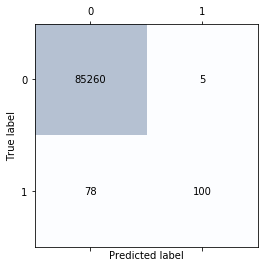

In [115]:
"""
使用全部的样本数据进行画混淆矩阵
"""
from matplotlib import pyplot as plt
#召回率：TP/(TP + FN) 0属于正列 1属于负列
from sklearn.metrics  import confusion_matrix

lr = LogisticRegression(C = 0.1, solver='liblinear',penalty = 'l2')
lr.fit(x_train,y_train.values.ravel())
y_predict = lr.predict(x_test)

#生成真实值和预测值的混淆矩阵
cm = confusion_matrix(y_test,y_predict,labels=[0,1])
print(y_test,y_predict)
print("recall rate:",cm[1,1]/(cm[1,1]+cm[0,1]))
print("精度：",(cm[0,0]+cm[1,1])/(cm[1,0] + cm[1,1]+cm[0,0]+cm[0,1]))


plt.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x = j, y = i,          #ax.text()在轴上添加文本
                s = cm[i, j], 
                va = 'center', 
                ha = 'center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
 
plt.tight_layout()
